#### Task 5(a): Take a binary image & a structuring element, perform Erosion & Dilation morphological operations

### Importing the Libraries

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Erosion

In [30]:
def erosion(image, structuring_element):
    eroded_image = image.copy()
    structuring_element = structuring_element * 255
    offset = structuring_element.shape[0] // 2
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            fit = True
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        sr, sc = x + offset, y + offset
                        if (structuring_element[sr, sc] and image[r + x, c + y] != structuring_element[sr, sc]):
                            fit = False
                    elif (structuring_element[x + offset, y + offset]):
                        fit = False
            eroded_image[r, c] = 255 if fit else 0

    return np.uint8(eroded_image)

### Function for Dilation

In [31]:
def dilation(image, structuring_element):
    dilated_image = image.copy()
    structuring_element = structuring_element * 255
    offset = structuring_element.shape[0] // 2
    height, width = image.shape

    for r in range(height):
        for c in range(width):
            hit = False
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        sr, sc = x + offset, y + offset
                        if (structuring_element[sr, sc] and image[r + x, c + y] == structuring_element[sr, sc]):
                            hit = True
            dilated_image[r, c] = 255 if hit else 0

    return np.uint8(dilated_image)

### Creating Structuring Element for Erosion & Dilation

In [32]:
structuring_element_size = 3
structuring_element = np.ones((structuring_element_size, structuring_element_size))

### Loading the Original Image

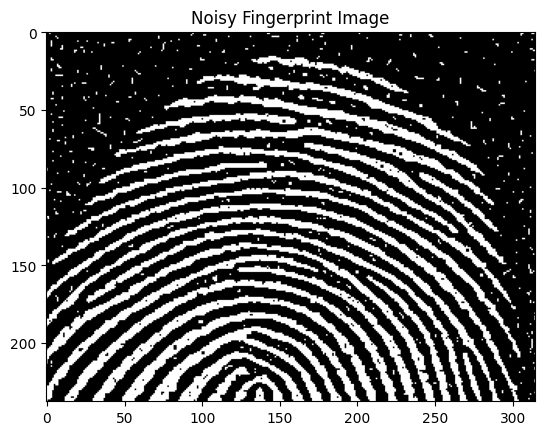

In [33]:
noisy_fingerprint = cv2.imread("./Noisy Fingerprint 315x238.tif", 0)
plt.imshow(noisy_fingerprint, cmap = "gray")
plt.title("Noisy Fingerprint Image")
plt.show()

### Applying Erosion

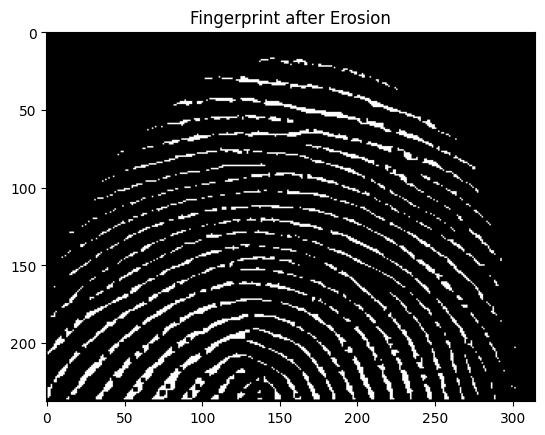

In [34]:
fingerprint_after_erosion = erosion(noisy_fingerprint, structuring_element)
plt.imshow(fingerprint_after_erosion, cmap = "gray")
plt.title("Fingerprint after Erosion")
plt.show()

### Applying Dilation

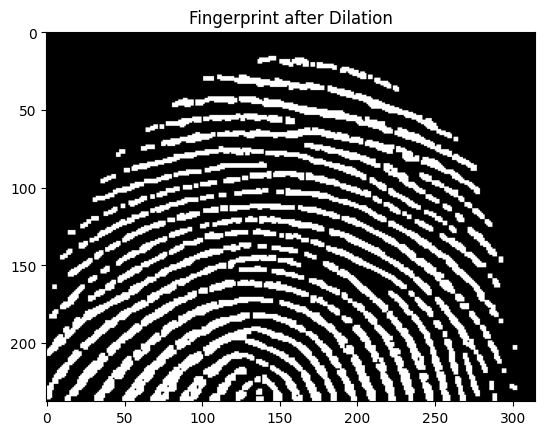

In [35]:
fingerprint_after_dilation = dilation(fingerprint_after_erosion, structuring_element)
plt.imshow(fingerprint_after_dilation, cmap = "gray")
plt.title("Fingerprint after Dilation")
plt.show()